File Path: 4-1-1


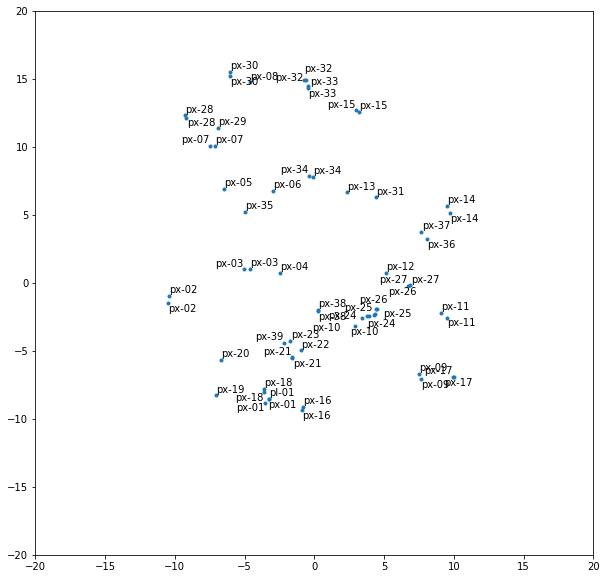

In [8]:
# -*- coding: utf-8 -*-
import os
import matplotlib.pyplot as plt
from adjustText import adjust_text

def getdata(pathname):
    filenames = os.listdir(path=pathname)
    pointnames = [text[6:11] for text in filenames]

    stage_x = []
    stage_y = []
    for filename in filenames:
        path = pathname+filename

        with open(path) as f:
            lines = f.readlines()

        lines_strip = list(map(lambda x: x.strip(), lines))

        for x in lines_strip:
            if x.startswith('$CM_STAGE_X'):
                stage_x.append(float(x[12:]))
            elif x.startswith('$CM_STAGE_Y'):
                stage_y.append(float(x[12:]))

    return stage_x, stage_y, pointnames


def point_plot(stage_x, stage_y, pointnames):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    points = []
    ax.plot(stage_x, stage_y, '.')
    for i in range(len(pointnames)):
        point = ax.text(stage_x[i], stage_y[i], pointnames[i], ha='center', va='center')
        points.append(point)
    adjust_text(points)
    ax.set_xlim(-20,20)
    ax.set_ylim(-20,20)
    plt.savefig('imgmap.png', dpi=300)
    plt.show()
    

def main():
    pathname = input('File Path:')+'_log/'
    stage_x, stage_y, pointnames = getdata(pathname)
    point_plot(stage_x, stage_y, pointnames)
    

if __name__ == '__main__':
    main()